In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [15]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [31]:
def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]}')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel('Acurácia')

    fig.suptitle('Boxplots Acurácia (10-Fold CV)')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold CV)')
    fig.tight_layout()
    
    plt.show()

def plot_comparison(df, pp1, pp2):
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(x=df.loc[pp1], 
                    y=df.loc[pp2], 
                    hue=df.columns, ax=ax)
    ax.plot([0.5, 1], [0.5, 1], 'k--', lw=1)
    ax.set_title('Acurácia média 10-Fold CV')
    ax.set_xlabel(pp1)
    ax.set_ylabel(pp2)

# Loading...

In [17]:
#DT
dt = load_metrics('dt')
dt_enc = load_metrics('dt_enc')
dt_pca = load_metrics('dt_pca')
dt_fs = load_metrics('dt_fs')
dt_pca_scaled = load_metrics('dt_pca_scaled')
dt_scaled = load_metrics('dt_scaled')
dt_fs_scaled = load_metrics('dt_fs_scaled')

# GNB
gnb = load_metrics('gnb')
gnb_enc = load_metrics('gnb_enc')
gnb_pca = load_metrics('gnb_pca')
gnb_fs = load_metrics('gnb_fs')
gnb_pca_scaled = load_metrics('gnb_pca_scaled')
gnb_scaled = load_metrics('gnb_scaled')
gnb_fs_scaled = load_metrics('gnb_fs_scaled')

#MNB
mnb = load_metrics('mnb')
mnb_enc = load_metrics('mnb_enc')
mnb_fs = load_metrics('mnb_fs')
mnb_pca_scaled = load_metrics('mnb_pca_scaled')
mnb_scaled = load_metrics('mnb_scaled')
mnb_fs_scaled = load_metrics('mnb_fs_scaled')

#KNN
knn = load_metrics('knn')
knn_enc = load_metrics('knn_enc')
knn_pca = load_metrics('knn_pca')
knn_fs = load_metrics('knn_fs')
knn_pca_scaled = load_metrics('knn_pca_scaled')
knn_scaled = load_metrics('knn_scaled')
knn_fs_scaled = load_metrics('knn_fs_scaled')

#SVC
svc = load_metrics('svc')
svc_enc = load_metrics('svc_enc')
svc_pca = load_metrics('svc_pca')
svc_fs = load_metrics('svc_fs')
svc_pca_scaled = load_metrics('svc_pca_scaled')
svc_scaled = load_metrics('svc_scaled')
svc_fs_scaled = load_metrics('svc_fs_scaled')

#MLP
mlp = load_metrics('mlp')
mlp_enc = load_metrics('mlp_enc')
mlp_pca = load_metrics('mlp_pca')
mlp_pca_scaled = load_metrics('mlp_pca_scaled')
mlp_scaled = load_metrics('mlp_scaled')

# Análise dos Modelos

In [18]:
df_f1 = pd.DataFrame({
    'DT': [dt[1].mean(), dt_scaled[1].mean(), dt_pca[1].mean(), dt_pca_scaled[1].mean(), dt_fs[1].mean(), dt_fs_scaled[1].mean(), dt_enc[1].mean()],
    'GNB': [gnb[1].mean(), gnb_scaled[1].mean(), gnb_pca[1].mean(), gnb_pca_scaled[1].mean(), gnb_fs[1].mean(), gnb_fs_scaled[1].mean(), gnb_enc[1].mean()],
    'MNB': [mnb[1].mean(), mnb_scaled[1].mean(), np.nan, mnb_pca_scaled[1].mean(), mnb_fs[1].mean(), mnb_fs_scaled[1].mean(), mnb_enc[1].mean()],
    'KNN': [knn[1].mean(), knn_scaled[1].mean(), knn_pca[1].mean(), knn_pca_scaled[1].mean(), knn_fs[1].mean(), knn_fs_scaled[1].mean(), knn_enc[1].mean()],
    'SVC': [svc[1].mean(), svc_scaled[1].mean(), svc_pca[1].mean(), svc_pca_scaled[1].mean(), svc_fs[1].mean(), svc_fs_scaled[1].mean(), svc_enc[1].mean()],
    'MLP': [mlp[1].mean(), mlp_scaled[1].mean(), mlp_pca[1].mean(), mlp_pca_scaled[1].mean(), np.nan, np.nan, mlp_enc[1].mean()],
}, index=['SPP', 'STDD', 'PCA', 'PCA_STDD', 'FSVT', 'FSVT_STDD', 'ENC'])

In [19]:
df_f1

,DT,GNB,MNB,KNN,SVC,MLP
SPP,0.747712,0.810691,0.834784,0.928610,0.947090,0.924943
STDD,0.741053,0.670828,0.833377,0.885968,0.929987,0.933805
PCA,0.733990,0.834226,NaN,0.933655,0.950175,0.920501
PCA_STDD,0.722533,0.401950,0.854245,0.908872,0.931509,0.938139
FSVT,0.745736,0.810691,0.834784,0.928610,0.947090,NaN
FSVT_STDD,0.751736,0.670828,0.816703,0.885968,0.929987,NaN
ENC,0.601426,0.803164,0.778510,0.919275,0.939215,0.914615


In [20]:
df_acc = pd.DataFrame({
    'DT': [dt[0].mean(), dt_scaled[0].mean(), dt_pca[0].mean(), dt_pca_scaled[0].mean(), dt_fs[0].mean(), dt_fs_scaled[0].mean(), dt_enc[0].mean()],
    'GNB': [gnb[0].mean(), gnb_scaled[0].mean(), gnb_pca[0].mean(), gnb_pca_scaled[0].mean(), gnb_fs[0].mean(), gnb_fs_scaled[0].mean(), gnb_enc[0].mean()],
    'MNB': [mnb[0].mean(), mnb_scaled[0].mean(), np.nan, mnb_pca_scaled[0].mean(), mnb_fs[0].mean(), mnb_fs_scaled[0].mean(), mnb_enc[0].mean()],
    'KNN': [knn[0].mean(), knn_scaled[0].mean(), knn_pca[0].mean(), knn_pca_scaled[0].mean(), knn_fs[0].mean(), knn_fs_scaled[0].mean(), knn_enc[0].mean()],
    'SVC': [svc[0].mean(), svc_scaled[0].mean(), svc_pca[0].mean(), svc_pca_scaled[0].mean(), svc_fs[0].mean(), svc_fs_scaled[0].mean(), svc_enc[0].mean()],
    'MLP': [mlp[0].mean(), mlp_scaled[0].mean(), mlp_pca[0].mean(), mlp_pca_scaled[0].mean(), np.nan, np.nan, mlp_enc[0].mean()],
}, index=['SPP', 'STDD', 'PCA', 'PCA_STDD', 'FSVT', 'FSVT_STDD', 'ENC'])

In [21]:
df_acc

,DT,GNB,MNB,KNN,SVC,MLP
SPP,0.748000,0.810667,0.833556,0.928889,0.947111,0.925111
STDD,0.742222,0.680222,0.832222,0.886889,0.930000,0.934000
PCA,0.734222,0.833556,NaN,0.934000,0.950222,0.920667
PCA_STDD,0.723333,0.441111,0.854444,0.909333,0.931556,0.938222
FSVT,0.746444,0.810667,0.833556,0.928889,0.947111,NaN
FSVT_STDD,0.752889,0.680222,0.816444,0.886889,0.930000,NaN
ENC,0.602667,0.804222,0.779111,0.919778,0.939333,0.914667


In [22]:
df_acc.loc['PCA']

DT     0.734222
GNB    0.833556
MNB         NaN
KNN    0.934000
SVC    0.950222
MLP    0.920667
Name: PCA, dtype: float64

Text(0, 0.5, 'Padronizado + PCA')

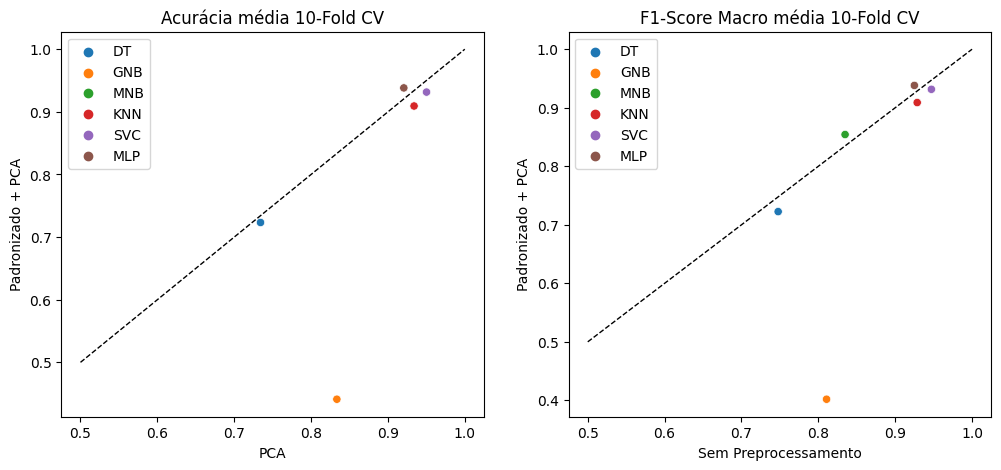

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x=df_acc.loc['PCA'], 
                y=df_acc.loc['PCA_STDD'], 
                hue=df_acc.columns, ax=ax[0])
sns.scatterplot(x=df_f1.loc['SPP'], 
                y=df_f1.loc['PCA_STDD'], 
                hue=df_acc.columns, ax=ax[1])
ax[0].plot([0.5, 1], [0.5, 1], 'k--', lw=1)
ax[1].plot([0.5, 1], [0.5, 1], 'k--', lw=1)

ax[0].set_title('Acurácia média 10-Fold CV')
ax[0].set_xlabel('PCA')
ax[0].set_ylabel('Padronizado + PCA')

ax[1].set_title('F1-Score Macro média 10-Fold CV')
ax[1].set_xlabel('Sem Preprocessamento')
ax[1].set_ylabel('Padronizado + PCA')

Text(0, 0.5, 'Padronizado + PCA')

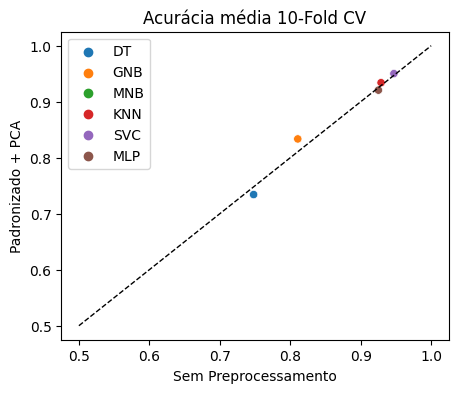

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(x=df_acc.loc['SPP'], 
                y=df_acc.loc['PCA'], 
                hue=df_acc.columns, ax=ax)
ax.plot([0.5, 1], [0.5, 1], 'k--', lw=1)

ax.set_title('Acurácia média 10-Fold CV')
ax.set_xlabel('Sem Preprocessamento')
ax.set_ylabel('Padronizado + PCA')

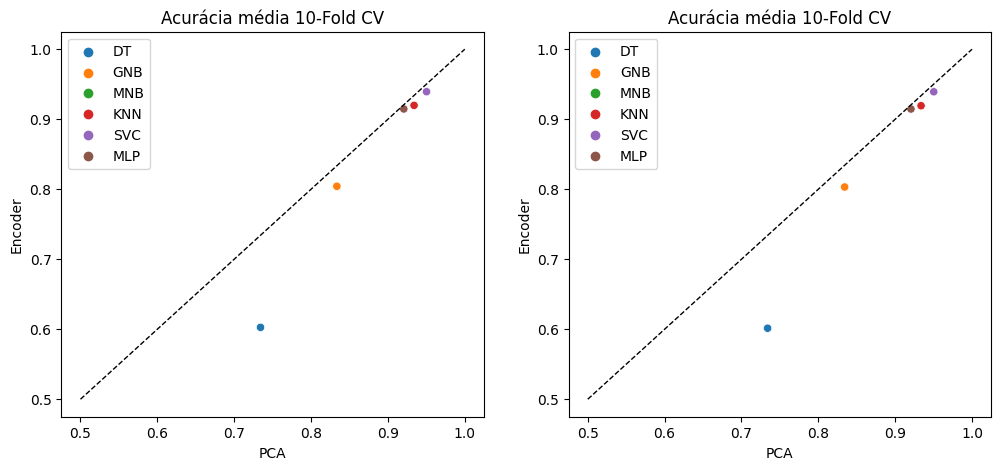

In [30]:
plot_comparison(df_acc, df_f1, 'PCA', 'ENC', 'PCA', 'Encoder')

# Plots

Text(0, 0.5, 'Padronizado + PCA')

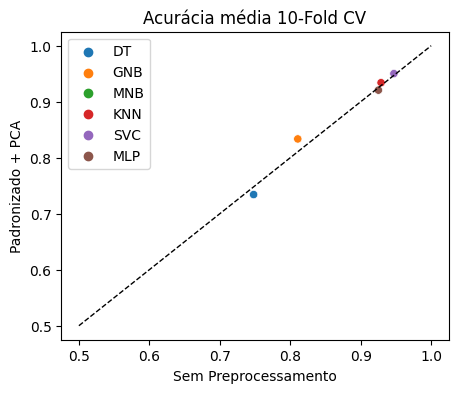

In [25]:
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(x=df_acc.loc['SPP'], 
                y=df_acc.loc['PCA'], 
                hue=df_acc.columns, ax=ax)
ax.plot([0.5, 1], [0.5, 1], 'k--', lw=1)

ax.set_title('Acurácia média 10-Fold CV')
ax.set_xlabel('Sem Preprocessamento')
ax.set_ylabel('Padronizado + PCA')

## Testes de Hipóteses


A seguir faremos testes de normalidade para a distribuição das Acurácias

### Hipóteses:

H0: Os dados seguem uma distribuição Normal

H1: C.C

In [26]:
from scipy import stats

def normality(test, *args):
    for arg in args:
        print(test(arg))
    
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)


Shapiro-Wilk



NameError: name 'dt_acc' is not defined

In [ ]:
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)


Shapiro-Wilk

ShapiroResult(statistic=0.9557310342788696, pvalue=0.7363175749778748)
ShapiroResult(statistic=0.9588919281959534, pvalue=0.7731674313545227)
ShapiroResult(statistic=0.9055513143539429, pvalue=0.25180885195732117)
ShapiroResult(statistic=0.9616227149963379, pvalue=0.8042067885398865)
ShapiroResult(statistic=0.9112376570701599, pvalue=0.28960084915161133)
ShapiroResult(statistic=0.8317874670028687, pvalue=0.035160694271326065)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=0.07032472116192653, pvalue=0.9654486527276549)
NormaltestResult(statistic=0.5683393647990886, pvalue=0.7526389242918852)
NormaltestResult(statistic=3.282992886979419, pvalue=0.19368997920510952)
NormaltestResult(statistic=0.2620630941001395, pvalue=0.8771901011944989)
NormaltestResult(statistic=0.9576789637633089, pvalue=0.6195019179943504)
NormaltestResult(statistic=6.07037950737027, pvalue=0.04806554139659742)


Pelos resultados, não conseguimos rejeitar a hipótese nula para nenhum dos conjuntos de acurácia

T-test para comparar as acurácias médias entre os três modelos mais bem sucedidos

In [ ]:
def ttest_multiple_samples(data:dict[str, list]) -> dict:
    from itertools import combinations

    combined_data = dict()
    for combined_key in combinations(data.keys(), 2):
        test_result = stats.ttest_rel(data[combined_key[0]], data[combined_key[1]], alternative='less')
        combined_data[f'{combined_key[0]}_{combined_key[1]}'] = test_result
        
    return combined_data

acc_data = {
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre a Acurácia dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)


Comparação entre a Acurácia dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.11867816581938001, pvalue=0.4540685041373918) 

Comparação entre a Acurácia dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.3297483715060885, pvalue=0.004401304495452533) 

Comparação entre a Acurácia dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.0616023205910348, pvalue=0.006768253224553435) 



In [ ]:
acc_data = {
    'MLP': mlp_f1,
    'KNN': knn_f1,
    'SVC': svc_f1,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre F1-Scores dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)



Comparação entre F1-Scores dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.0596478507684344, pvalue=0.4768697905233652) 

Comparação entre F1-Scores dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.396555717537453, pvalue=0.003958207048708713) 

Comparação entre F1-Scores dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.1502062444121064, pvalue=0.005866827594351189) 

